In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
TRAIN_PATH="/content/drive/MyDrive/EuroSAT_RGB/Training"

In [3]:
VAL_PATH="/content/drive/MyDrive/EuroSAT_RGB/Testing"

In [4]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
#model definition
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the mode
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [8]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EuroSAT_RGB/Training',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 27880 images belonging to 10 classes.


In [9]:
train_generator.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [10]:
#creating the validation function
validation_generator=test_dataset.flow_from_directory(
    '/content/drive/MyDrive/EuroSAT_RGB/Testing',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 2700 images belonging to 10 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=5,
    validation_data = validation_generator,
    validation_steps=2
)

<ipython-input-11-ee968ffe0316>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
8/8 [==============================] - 181s 23s/step - loss: 1.0869 - accuracy: 0.8156 - val_loss: 0.5543 - val_accuracy: 0.9000
Epoch 2/5
8/8 [==============================] - 141s 17s/step - loss: 0.4013 - accuracy: 0.8875 - val_loss: 0.4848 - val_accuracy: 0.9000
Epoch 3/5
8/8 [==============================] - 148s 18s/step - loss: 0.3631 - accuracy: 0.9000 - val_loss: 0.3691 - val_accuracy: 0.9000
Epoch 4/5
8/8 [==============================] - 144s 18s/step - loss: 0.3498 - accuracy: 0.9000 - val_loss: 0.3865 - val_accuracy: 0.9000
Epoch 5/5
8/8 [==============================] - 141s 17s/step - loss: 0.3445 - accuracy: 0.9000 - val_loss: 0.3865 - val_accuracy: 0.9000


In [12]:
#model.evaluate_generator(train_generator)

In [13]:
#model.evaluate_generator(validation_generator)

In [14]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

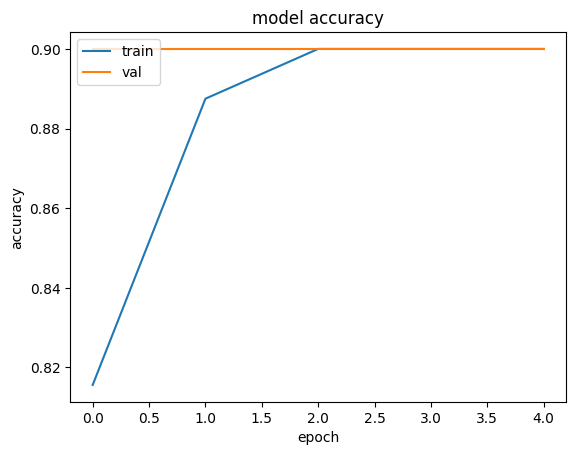

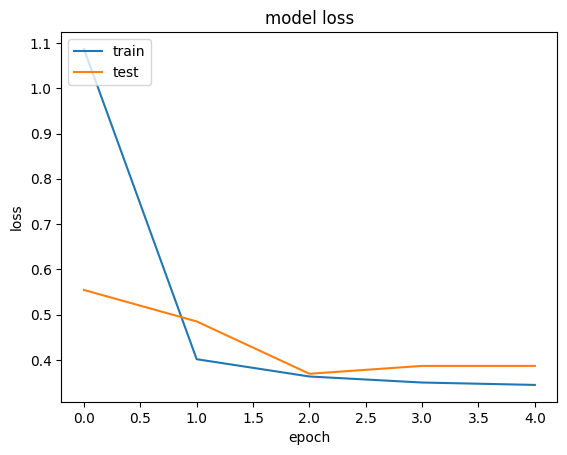

In [15]:
import matplotlib.pyplot as plt
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()